In [46]:
from data_loader import load_latest_iteration, find_latest_vtu_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
mode = "hard"
FOLDER = f"../demo/cpp/hard/build/src/vtk_output_{mode}/data"

data = load_latest_iteration(FOLDER)

Latest iteration 0 is not the same as the global latest iteration 119


In [48]:
data.keys()

dict_keys(['particles', 'domain', 'constraints', 'parameters', 'simulation'])

In [49]:
particles = data["particles"]
parameters = data["parameters"]

In [50]:
params = data["parameters"]
params

,dt_s,end_radius,log_frequency_seconds,min_box_size_x,min_box_size_y,min_box_size_z,xi,TAU,l0,LAMBDA,...,max_bbpgd_iterations,max_recursive_iterations,linked_cell_size,growth_factor,particle_preallocation_factor,mode,x,y,z,rank
0,0.001,30.0,0.06,2.0,2.0,0.0,1.0,1.0,1.0,0.01,...,100000,50,2.2,1.5,12.0,0,NaN,NaN,NaN,0


In [51]:
particles.describe()

,gid,quaternion_x,quaternion_y,quaternion_z,quaternion_w,orientation_x,orientation_y,orientation_z,lengths_x,lengths_y,...,velocity_linear_x,velocity_linear_y,velocity_linear_z,velocity_angular_x,velocity_angular_y,velocity_angular_z,rank,x,y,z
count,649.000000,649.000000,649.0,649.0,649.000000,649.000000,649.000000,649.0,649.000000,649.0,...,649.000000,649.000000,649.0,649.0,649.0,649.000000,649.000000,649.000000,649.000000,649.0
mean,324.000000,0.741784,0.0,0.0,0.367585,0.247227,0.369604,0.0,1.431820,0.5,...,0.000334,-0.000725,0.0,0.0,0.0,-0.004635,6.602465,-0.040019,-0.022593,0.0
std,187.494444,0.271077,0.0,0.0,0.491569,0.635638,0.632040,0.0,0.337741,0.0,...,0.150364,0.152251,0.0,0.0,0.0,0.234663,3.417781,6.740095,6.194980,0.0
min,0.000000,-0.512954,0.0,0.0,-0.859077,-0.997449,-0.999930,0.0,1.007490,0.5,...,-1.444050,-0.697849,0.0,0.0,0.0,-3.648470,1.000000,-12.816400,-12.101900,0.0
25%,162.000000,0.595510,0.0,0.0,0.013886,-0.290736,-0.071973,0.0,1.076030,0.5,...,-0.099624,-0.093796,0.0,0.0,0.0,-0.065989,4.000000,-5.515430,-4.945340,0.0
50%,324.000000,0.847637,0.0,0.0,0.453550,0.436978,0.618709,0.0,1.474540,0.5,...,-0.013647,-0.011216,0.0,0.0,0.0,0.000747,7.000000,-0.017463,0.017349,0.0
75%,486.000000,0.952953,0.0,0.0,0.802210,0.816238,0.877180,0.0,1.743360,0.5,...,0.093109,0.087791,0.0,0.0,0.0,0.068520,9.000000,5.355310,4.939680,0.0
max,648.000000,0.999991,0.0,0.0,0.999362,0.999965,0.999981,0.0,1.996790,0.5,...,0.901285,1.857570,0.0,0.0,0.0,1.600360,13.000000,12.884800,12.302000,0.0


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wavelength
import stress

[23-08-2025 18:59:54] [findpeaks.interpolate] [INFO] Interpolating 1d-vector by factor 2


[np.float64(7.272727272727273)]


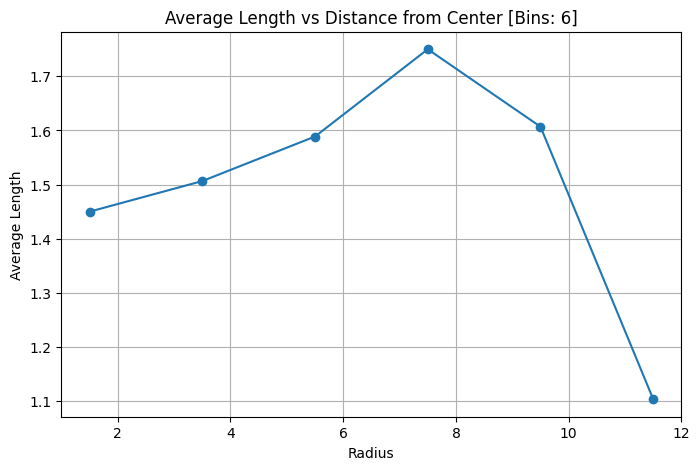

In [53]:
bin_centers, avg_length, wavelength_fft = wavelength.comprehensive_wavelength_analysis(
    particles, start_bin=1, step_bin=2)


plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_length, "o-", label="Avg Length")
plt.xlabel("Radius")
plt.ylabel("Average Length")
plt.title(
    f"Average Length vs Distance from Center [Bins: {bin_centers.size}]")
plt.grid(True)

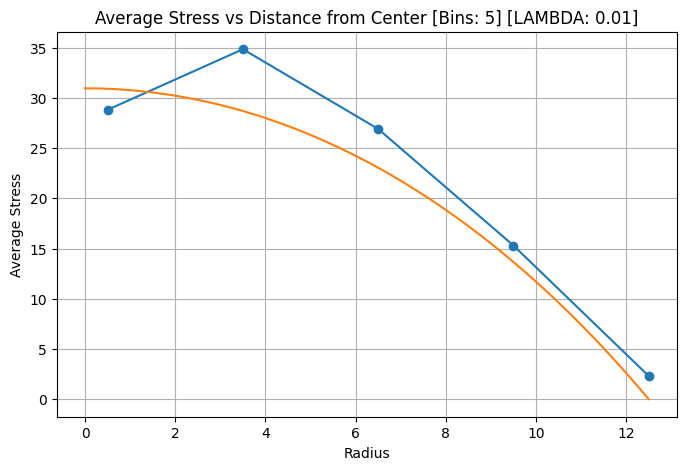

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wavelength
import stress


def pressure_theoretical(r, R, LAMBDA):
    c = (np.sqrt((1 + LAMBDA * R**2 / 2)) - 1) / (2 * LAMBDA * R**2)

    return 2 / LAMBDA * np.log(1/(8*c) - c * LAMBDA * r**2)


bin_centers, avg_impedance = stress.stress_distribution(particles)


plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_impedance, "o-", label="Avg Stress")

r = np.linspace(0, bin_centers[-1], 100)

plt.plot(r, pressure_theoretical(r, bin_centers[-1], data["parameters"]["LAMBDA"][0]),
         label="Theoretical")

plt.xlabel("Radius")
plt.ylabel("Average Stress")
plt.title(
    f"Average Stress vs Distance from Center [Bins: {bin_centers.size}] [LAMBDA: {data['parameters']['LAMBDA'][0]}]")
plt.grid(True)
plt.savefig(f"stress_{mode}.png")